In [1]:
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from simforest.cluster import SimilarityForestCluster
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Accent'
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

import warnings
warnings.simplefilter('ignore', RuntimeWarning)

For each dataset, unsupervised Similarity Forest is fitted, returning a similarity matrix for each pair of points. This matrix is then used for clustering using HDBSCAN.

# Iris

In [2]:
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)

sf = SimilarityForestCluster(n_estimators=20, sim_function='euclidean', technique='hdbscan')
sf = sf.fit(X)
sf_distance_matrix = sf.distance_matrix_

Each entry in the matrix represent depth, at which a pair of points splits. By dividing by the number of threes, we can observe average split depth.

In [3]:
sf_distance_matrix[11, 27] / 20

12.7

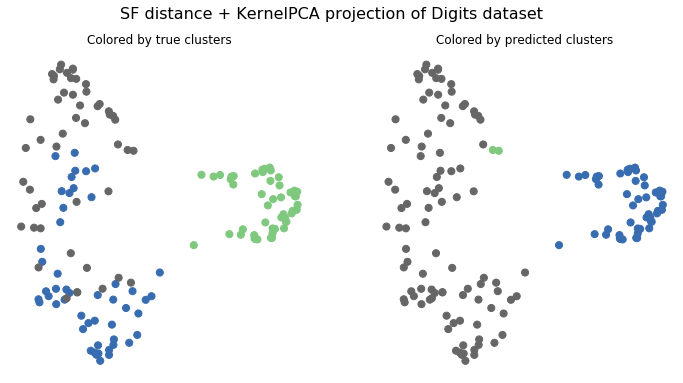

In [4]:
sf_pca = KernelPCA(n_components=2, kernel='precomputed')
sf_projection = sf_pca.fit_transform(sf_distance_matrix)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('SF distance + KernelPCA projection of Digits dataset', fontsize=16)
ax1.scatter(sf_projection[:, 0], sf_projection[:, 1], c=y, s=50);
ax1.set_title('Colored by true clusters');
ax2.scatter(sf_projection[:, 0], sf_projection[:, 1], c=sf.labels_, s=50);
ax2.set_title('Colored by predicted clusters');
ax1.axis('off');
ax2.axis('off');

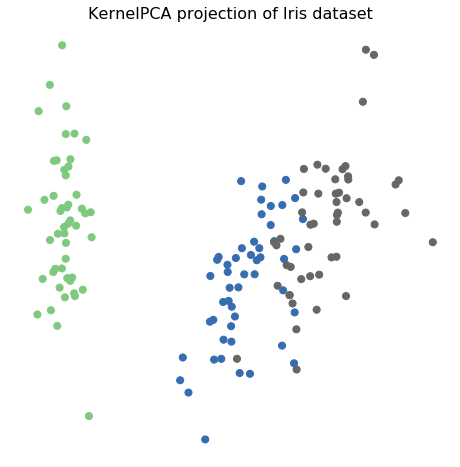

In [5]:
pca = KernelPCA(n_components=2)
original_projection = pca.fit_transform(X)
plt.scatter(original_projection[:, 0], original_projection[:, 1], c=y, s=50);
plt.title('KernelPCA projection of Iris dataset', fontsize=16);
plt.axis('off');

# Breast cancer

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X = StandardScaler().fit_transform(X)

sf = SimilarityForestCluster(n_estimators=20, sim_function='euclidean', technique='hdbscan')
sf = sf.fit(X)
sf_distance_matrix = sf.distance_matrix_

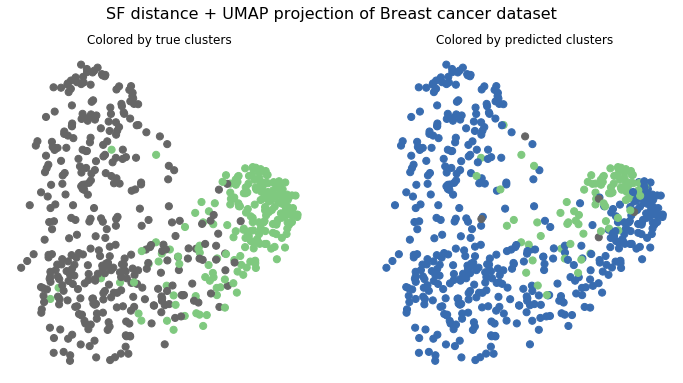

In [7]:
sf_pca = KernelPCA(n_components=2, kernel='precomputed')
sf_projection = sf_pca.fit_transform(sf_distance_matrix)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('SF distance + UMAP projection of Breast cancer dataset', fontsize=16)
ax1.scatter(sf_projection[:, 0], sf_projection[:, 1], c=y, s=50);
ax1.set_title('Colored by true clusters');
ax2.scatter(sf_projection[:, 0], sf_projection[:, 1], c=sf.labels_, s=50);
ax2.set_title('Colored by predicted clusters');
ax1.axis('off');
ax2.axis('off');

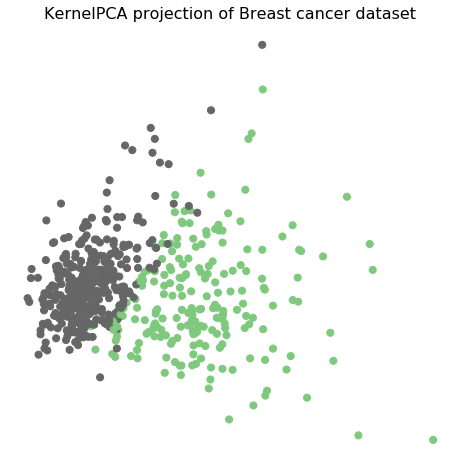

In [8]:
pca = KernelPCA(n_components=2)
original_projection = pca.fit_transform(X)
plt.scatter(original_projection[:, 0], original_projection[:, 1], c=y, s=50);
plt.title('KernelPCA projection of Breast cancer dataset', fontsize=16);
plt.axis('off');

# Wine

In [9]:
X, y = load_wine(return_X_y=True)
X = StandardScaler().fit_transform(X)

sf = SimilarityForestCluster(n_estimators=20, sim_function='euclidean', technique='hdbscan')
sf = sf.fit(X)
sf_distance_matrix = sf.distance_matrix_

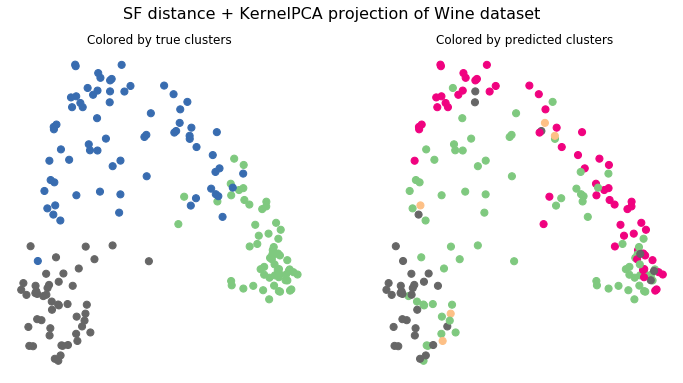

In [10]:
sf_pca = KernelPCA(n_components=2, kernel='precomputed')
sf_projection = sf_pca.fit_transform(sf_distance_matrix)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('SF distance + KernelPCA projection of Wine dataset', fontsize=16)
ax1.scatter(sf_projection[:, 0], sf_projection[:, 1], c=y, s=50);
ax1.set_title('Colored by true clusters');
ax2.scatter(sf_projection[:, 0], sf_projection[:, 1], c=sf.labels_, s=50);
ax2.set_title('Colored by predicted clusters');
ax1.axis('off');
ax2.axis('off');

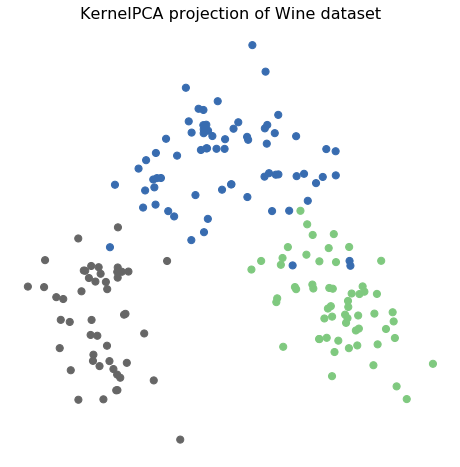

In [11]:
pca = KernelPCA(n_components=2)
original_projection = pca.fit_transform(X)
plt.scatter(original_projection[:, 0], original_projection[:, 1], c=y, s=50);
plt.title('KernelPCA projection of Wine dataset', fontsize=16);
plt.axis('off');

# Digits

In [12]:
X, y = load_digits(return_X_y=True)
X = StandardScaler().fit_transform(X)

sf = SimilarityForestCluster(n_estimators=20, sim_function='euclidean', technique='hdbscan')
sf = sf.fit(X)
sf_distance_matrix = sf.distance_matrix_

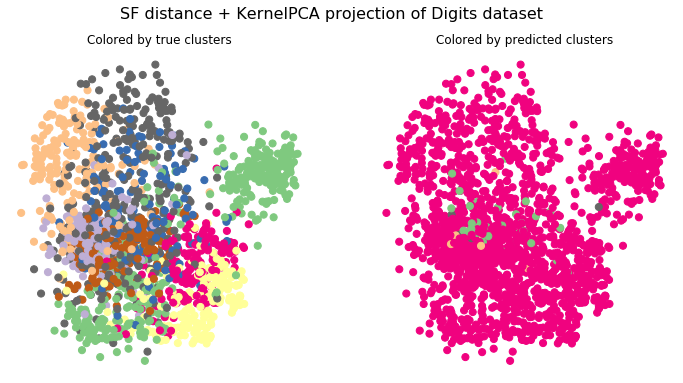

In [13]:
sf_pca = KernelPCA(n_components=2, kernel='precomputed')
sf_projection = sf_pca.fit_transform(sf_distance_matrix)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('SF distance + KernelPCA projection of Digits dataset', fontsize=16)
ax1.scatter(sf_projection[:, 0], sf_projection[:, 1], c=y, s=50);
ax1.set_title('Colored by true clusters');
ax2.scatter(sf_projection[:, 0], sf_projection[:, 1], c=sf.labels_, s=50);
ax2.set_title('Colored by predicted clusters');
ax1.axis('off');
ax2.axis('off');

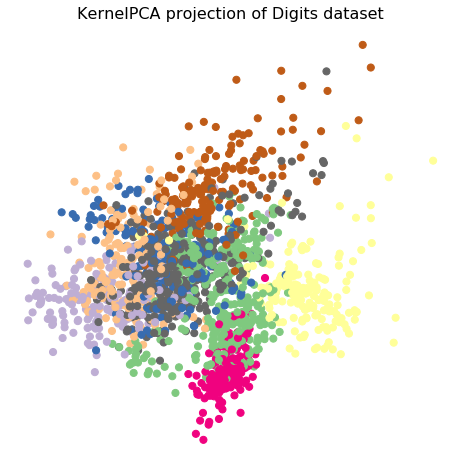

In [14]:
pca = KernelPCA(n_components=2)
original_projection = pca.fit_transform(X)
plt.scatter(original_projection[:, 0], original_projection[:, 1], c=y, s=50);
plt.title('KernelPCA projection of Digits dataset', fontsize=16);
plt.axis('off');

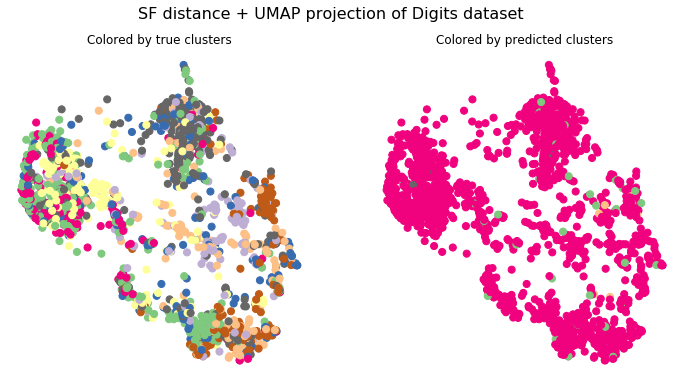

In [15]:
import umap

sf_umap = umap.UMAP(n_components=2, metric='precomputed', n_neighbors=3)
sf_projection = sf_umap.fit_transform(sf_distance_matrix)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('SF distance + UMAP projection of Digits dataset', fontsize=16)
ax1.scatter(sf_projection[:, 0], sf_projection[:, 1], c=y, s=50);
ax1.set_title('Colored by true clusters');
ax2.scatter(sf_projection[:, 0], sf_projection[:, 1], c=sf.labels_, s=50);
ax2.set_title('Colored by predicted clusters');
ax1.axis('off');
ax2.axis('off');

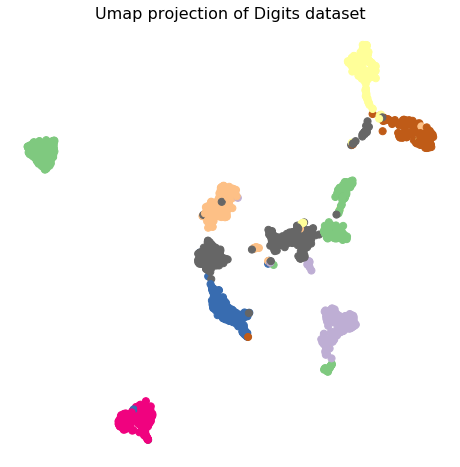

In [16]:
umap = umap.UMAP(n_components=2)
original_projection = umap.fit_transform(X)
plt.scatter(original_projection[:, 0], original_projection[:, 1], c=y, s=50);
plt.title('Umap projection of Digits dataset', fontsize=16);
plt.axis('off');